# Загрузка Pandas и очистка данных

In [1]:
import pandas as pd
import datetime
from datetime import datetime
import re
import numpy as np

In [2]:
data = pd.read_csv('main_task_new.csv')

In [3]:
data.head()

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643
1,id_1535,Stockholm,NaN,1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781
3,id_3456,Berlin,NaN,3458.0,5.0,NaN,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,$$ - $$$,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963


In [4]:
data.columns = ['Restaurant_id', 'City', 'Cuisine_Style', 'Ranking', 'Rating',
       'Price_Range', 'Number_of_Reviews', 'Reviews', 'URL_TA', 'ID_TA']

<AxesSubplot:>

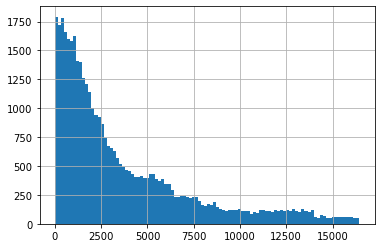

In [5]:
data.Ranking.hist(bins = 100)

<AxesSubplot:>

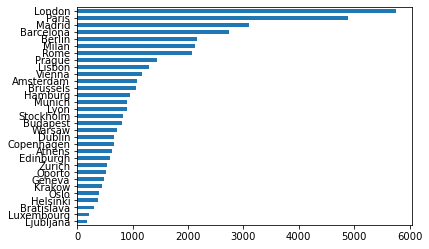

In [6]:
data.City.value_counts(ascending=True).plot(kind='barh')

<AxesSubplot:>

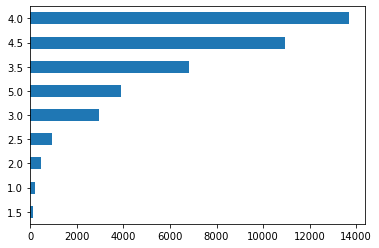

In [7]:
data.Rating.value_counts(ascending=True).plot(kind='barh')

<AxesSubplot:>

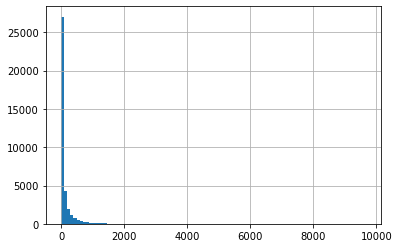

In [8]:
data.Number_of_Reviews.hist(bins = 100)

In [9]:
data[data.Number_of_Reviews > 1000].City.value_counts()

Rome          116
London        113
Paris          58
Milan          53
Barcelona      49
Prague         33
Madrid         32
Edinburgh      31
Budapest       28
Lisbon         26
Amsterdam      22
Berlin         20
Dublin         14
Brussels       10
Vienna          9
Oporto          9
Athens          9
Munich          8
Stockholm       8
Krakow          6
Lyon            5
Oslo            4
Warsaw          4
Geneva          2
Helsinki        1
Zurich          1
Copenhagen      1
Bratislava      1
Name: City, dtype: int64

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      40000 non-null  object 
 1   City               40000 non-null  object 
 2   Cuisine_Style      30717 non-null  object 
 3   Ranking            40000 non-null  float64
 4   Rating             40000 non-null  float64
 5   Price_Range        26114 non-null  object 
 6   Number_of_Reviews  37457 non-null  float64
 7   Reviews            40000 non-null  object 
 8   URL_TA             40000 non-null  object 
 9   ID_TA              40000 non-null  object 
dtypes: float64(3), object(7)
memory usage: 3.1+ MB


#### Далее выделяем кухни для создания новых признаков

In [11]:
cuisine_set = set()
cuisine_list = []
def cuisine_counter(cuisine_str):
    cuisine = re.findall("\w+\s*\w*", cuisine_str)
    for el in cuisine:
        cuisine_list.append(el)

In [12]:
new_data = data.Cuisine_Style.dropna(axis = 0).reset_index()
for i in range(len(new_data)):
    cuisine_counter(new_data.Cuisine_Style[i])
    
cuisine_list = sorted(cuisine_list)

In [13]:
counter = 1
max_val = 0
cousine = ''
new_cousine = []

for i in range(len(cuisine_list) - 1):
    if cuisine_list[i] == cuisine_list[i+1]:
        counter += 1
    else:
        if counter > max_val:
            max_val = counter
            counter = 1
            cousine = cuisine_list[i]
        new_cousine.append(cuisine_list[i])

if cuisine_list[len(cuisine_list)-1] not in new_cousine:
    new_cousine.append(cuisine_list[len(cuisine_list)-1])

In [14]:
new_cousine

['Afghani',
 'African',
 'Albanian',
 'American',
 'Arabic',
 'Argentinean',
 'Armenian',
 'Asian',
 'Australian',
 'Austrian',
 'Azerbaijani',
 'Balti',
 'Bangladeshi',
 'Bar',
 'Barbecue',
 'Belgian',
 'Brazilian',
 'Brew Pub',
 'British',
 'Burmese',
 'Cafe',
 'Cajun ',
 'Cambodian',
 'Canadian',
 'Caribbean',
 'Caucasian',
 'Central American',
 'Central Asian',
 'Central European',
 'Chilean',
 'Chinese',
 'Colombian',
 'Contemporary',
 'Creole',
 'Croatian',
 'Cuban',
 'Czech',
 'Danish',
 'Delicatessen',
 'Diner',
 'Dutch',
 'Eastern European',
 'Ecuadorean',
 'Egyptian',
 'Ethiopian',
 'European',
 'Fast Food',
 'Filipino',
 'French',
 'Fujian',
 'Fusion',
 'Gastropub',
 'Georgian',
 'German',
 'Gluten Free',
 'Greek',
 'Grill',
 'Halal',
 'Hawaiian',
 'Healthy',
 'Hungarian',
 'Indian',
 'Indonesian',
 'International',
 'Irish',
 'Israeli',
 'Italian',
 'Jamaican',
 'Japanese',
 'Korean',
 'Kosher',
 'Latin',
 'Latvian',
 'Lebanese',
 'Malaysian',
 'Mediterranean',
 'Mexican',


In [15]:
data.Cuisine_Style

0                  ['European', 'French', 'International']
1                                                      NaN
2        ['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...
3                                                      NaN
4        ['German', 'Central European', 'Vegetarian Fri...
                               ...                        
39995    ['Italian', 'Vegetarian Friendly', 'Vegan Opti...
39996    ['French', 'American', 'Bar', 'European', 'Veg...
39997                                ['Japanese', 'Sushi']
39998    ['Polish', 'European', 'Eastern European', 'Ce...
39999                                          ['Spanish']
Name: Cuisine_Style, Length: 40000, dtype: object

In [16]:
for cuisine in new_cousine:
    data[cuisine] = 0
    for i in range(40000):
        if type(data.Cuisine_Style.iloc[i]) == float:
            continue
        if cuisine in data.Cuisine_Style.iloc[i]:
            data[cuisine].iloc[i] = 1

C:\Users\Asus\Documents\studying\All_for_IT\Anaconda\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Columns: 137 entries, Restaurant_id to Yunnan
dtypes: float64(3), int64(127), object(7)
memory usage: 41.8+ MB


#### Cuisine_avg - признак, отвечающий сколько у нас кухонь в среднем

In [18]:
def Cusine_counter(cuisine_list):
    counter = 0
    for sym in cuisine_list:
        if sym == ',':
            counter += 1
    return counter + 1


data['Cuisine_avg'] = data.Cuisine_Style.dropna(axis=0).apply(Cusine_counter)

In [19]:
data.Cuisine_avg = data.Cuisine_avg.fillna(1)

#### Last_Review - признак, показывающий дату последнего отзыва

In [20]:
def LastReviewTime(RewStr):
    new_time = []
    time_list = re.findall(r'\d+/\d+/\d+', RewStr)

    for time in time_list:
        try:
            datestr = datetime.strptime(time, '%m/%d/%Y')
        except:
            datestr = datetime.strptime(time, '%d/%m/%Y')
        new_time.append(datestr)
   
    if len (new_time) > 0:
        MaxTime = max(new_time)
        return datetime.strftime(MaxTime, '%Y-%m-%d')
    return None

In [21]:
data['Last_Review'] = data.Reviews.apply(LastReviewTime)

#### ReviewDist - признак, обозначающий количество времени, прошедшего между 1 и последним отзывами

In [22]:
def ReviewDist(RewStr):
    new_time = []
    time_list = re.findall(r'\d+/\d+/\d+', RewStr)

    for time in time_list:
        try:
            datestr = datetime.strptime(time, '%m/%d/%Y')
        except:
            datestr = datetime.strptime(time, '%d/%m/%Y')
        new_time.append(datestr)
        
    if len(new_time) == 2:
        return abs((new_time[0] - new_time[1]).days)
    elif len(new_time) == 3:
        return max(abs((new_time[0] - new_time[1]).days), abs((new_time[0] - new_time[2]).days), (new_time[2] - new_time[1]).days)
    return 0

In [23]:
data['ReviewDist'] = data.Reviews.apply(ReviewDist)

In [24]:
data = pd.concat([data, pd.get_dummies(data.City)], axis = 1)

#### ReviewDaysPassed - признак, обозначающий сколько дней прошло с последнего отзыва

In [25]:
def ReviewDaysPassed(DateStr):
    try:
        DateStr = datetime.strptime(DateStr, '%Y-%m-%d')
        today = datetime.today()
        return (today - DateStr).days
    except:
        return None

In [26]:
data['ReviewDaysPassed'] = data.Last_Review.apply(ReviewDaysPassed)

In [27]:
mean_days = round(data['ReviewDaysPassed'].mean())
data['ReviewDaysPassed'] = data['ReviewDaysPassed'].fillna(mean_days)

#### добавляем One-Hot Encoding для цен

In [28]:
price = pd.get_dummies(data.Price_Range, dummy_na=True)

In [29]:
data = pd.concat([data, price], axis = 1)

In [30]:
RaitCorr = data.corr().Rating

In [31]:
abs(RaitCorr > 0.5).sum()

1

In [32]:
X = data.drop(['City', 'Cuisine_Style', 'Price_Range', 'Reviews', 'URL_TA', 'ID_TA'], axis = 1)

In [33]:
mean_nor = X['Number_of_Reviews'].mean()
X['Number_of_Reviews'] = X['Number_of_Reviews'].fillna(mean_nor)

# Разбиваем датафрейм на части, необходимые для обучения и тестирования модели

In [34]:
# Х - данные с информацией о ресторанах, у - целевая переменная (рейтинги ресторанов)
X = X.drop(['Restaurant_id', 'Rating', 'Last_Review'], axis = 1)
y = data['Rating']

In [35]:
# Загружаем специальный инструмент для разбивки:
from sklearn.model_selection import train_test_split

In [36]:
# Наборы данных с меткой "train" будут использоваться для обучения модели, "test" - для тестирования.
# Для тестирования мы будем использовать 25% от исходного датасета.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Создаём, обучаем и тестируем модель

In [37]:
# Импортируем необходимые библиотеки:
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели
from sklearn import metrics # инструменты для оценки точности модели

In [38]:
# Создаём модель
regr = RandomForestRegressor(n_estimators=100)

# Обучаем модель на тестовом наборе данных
regr.fit(X_train, y_train)

# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
y_pred = regr.predict(X_test)

In [39]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
# Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

MAE: 0.21782799999999997
